In [2]:
%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np
import scipy
import matplotlib.pyplot as plt


# switch of the too many warnings...
import warnings
warnings.filterwarnings('ignore')

# odemis h5 to hspy function:
from odemishspy import odemis_to_hyperspy
from odemishspy import odemisSEM_to_hyperspy



<IPython.core.display.Javascript object>


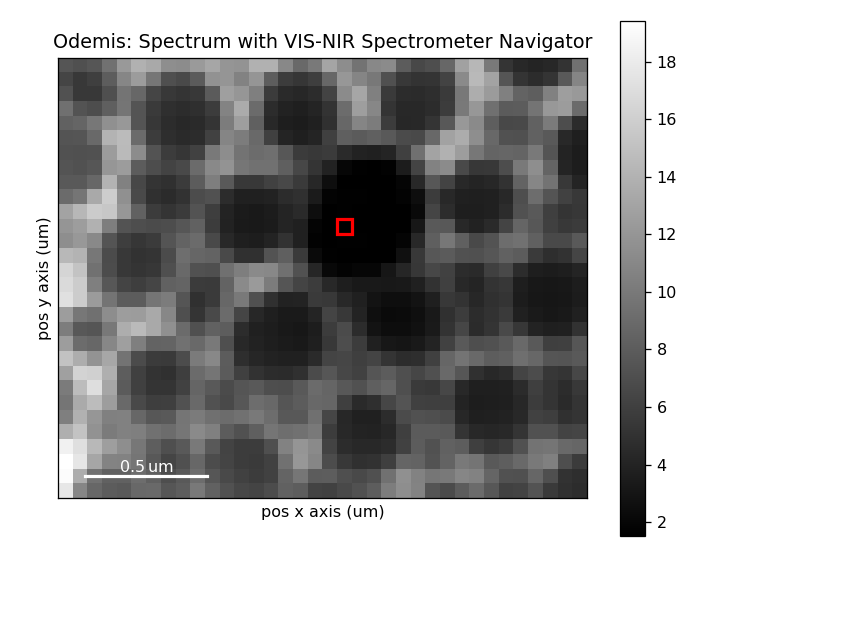

<IPython.core.display.Javascript object>


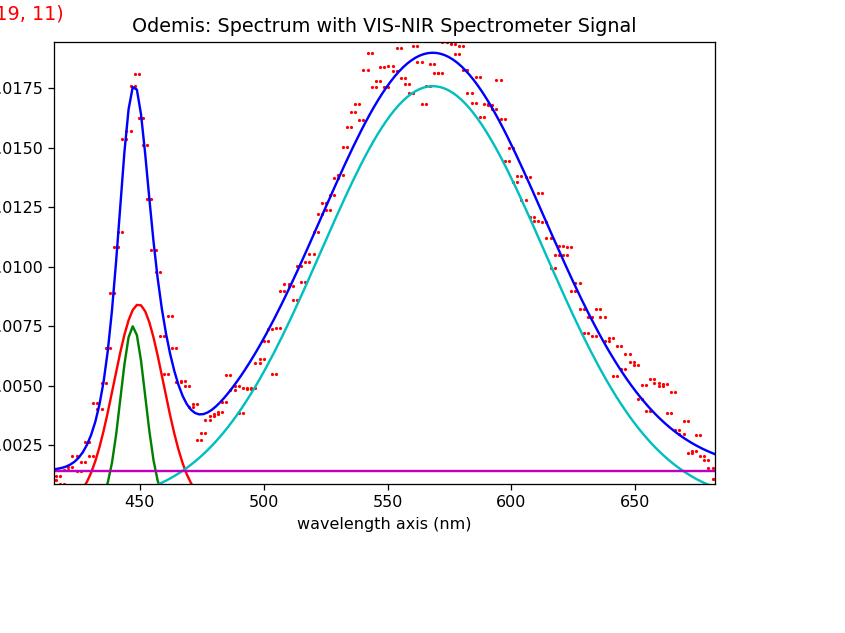

Accordion(children=(VBox(children=(Checkbox(value=True, description='active'), HBox(children=(FloatText(value=…

In [3]:
s = hs.load('sampledata/cltest2.hspy')
#s = odemis_to_hyperspy('sampledata/cltest2.h5',specbin=16) 

# for some strange reason the full rebin does not work in win/anaconda:
#s = s.rebin(scale=[3,3,1])


# new_shape works!
#s = s.rebin(new_shape=[50,20,500])




s = s - s.data.min()
s = s / s.data.max()

#s.plot()
m = s.create_model()
g1 = hs.model.components1D.Gaussian()
g2 = hs.model.components1D.Gaussian()
g3 = hs.model.components1D.Gaussian()
g4 = hs.model.components1D.Offset()
m.extend([g1, g2,g3,g4])
g1.name = "Ex1"
g2.name = "Ex2"
g3.name = 'Defect'

#
g4.offset.value = 0

g1.A.value = 2.6
g1.A.bmin = 0
g1.A.bmax = 50
g1.A.bounded = True
g1.centre.value = 450
g1.centre.bmin = 440
g1.centre.bmax = 460
g1.centre.bounded = True
g1.sigma.value = 5
g1.sigma.bmin = 1
g1.sigma.bmax = 15
g1.sigma.bounded = True

g2.A.value = 2
g2.A.bmin = 0
g2.A.bmax = 50
g2.A.bounded = True
g2.centre.value = 454
g2.centre.bmin = 445
g2.centre.bmax = 470
g2.centre.bounded = True
g2.sigma.value = 5
g2.sigma.bmin = 1
g2.sigma.bmax = 10
g2.sigma.bounded = True

g3.A.value = 1
g3.A.bmin = 0
g3.A.bmax = 50
g3.A.bounded = True
g3.centre.value = 550
g3.centre.bmin = 540
g3.centre.bmax = 580
g3.centre.bounded = True
g3.sigma.value = 30
g3.sigma.bmin = 10
g3.sigma.bmax = 50
g3.sigma.bounded = True


 
m.plot(plot_components=True)
m.gui()

In [4]:
m.fit(bounded=True)

In [48]:
m.print_current_values()


Components	Parameter	Value
Ex1
		A	2.6
		centre	450
		sigma	5
Ex2
		A	2
		centre	454
		sigma	5
Defect
		A	1
		centre	550
		sigma	30
Offset
		offset	0


In [26]:
m.multifit(bounded=True)

HBox(children=(IntProgress(value=0, max=1080), HTML(value='')))

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


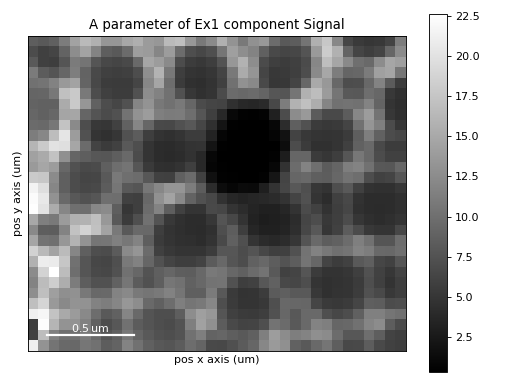

<IPython.core.display.Javascript object>


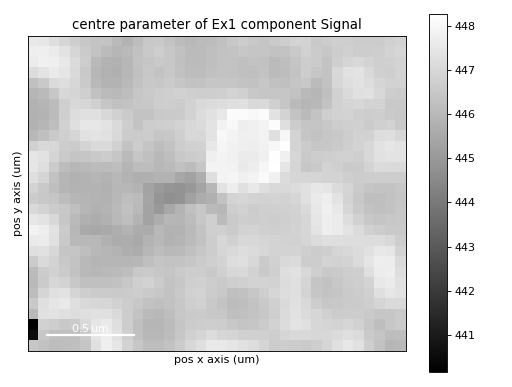

<IPython.core.display.Javascript object>


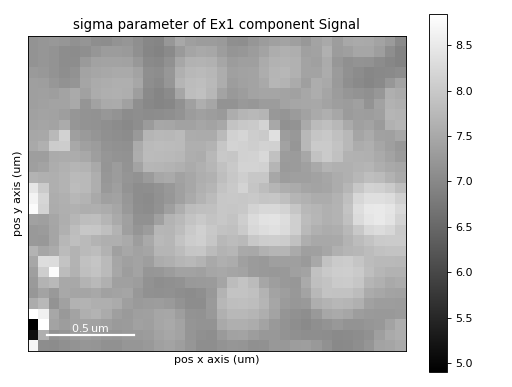

<IPython.core.display.Javascript object>


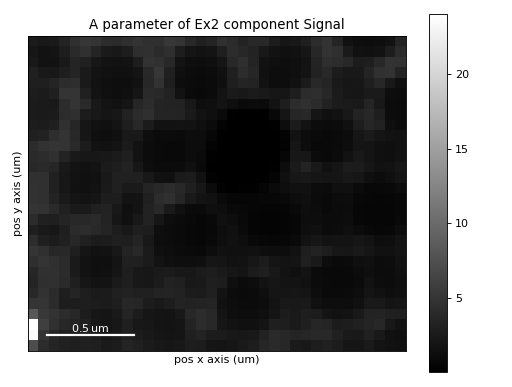

<IPython.core.display.Javascript object>


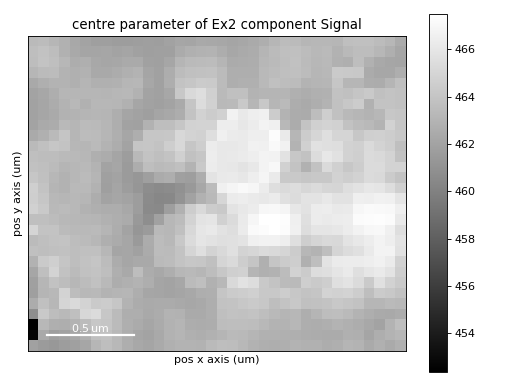

<IPython.core.display.Javascript object>


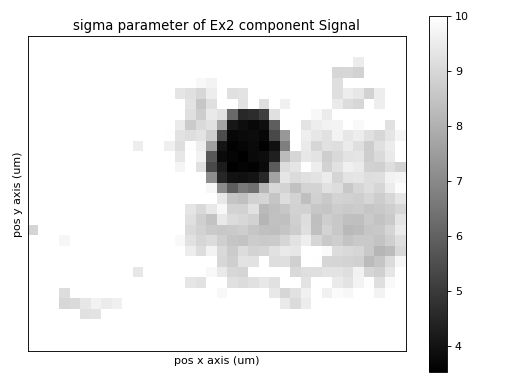

<IPython.core.display.Javascript object>


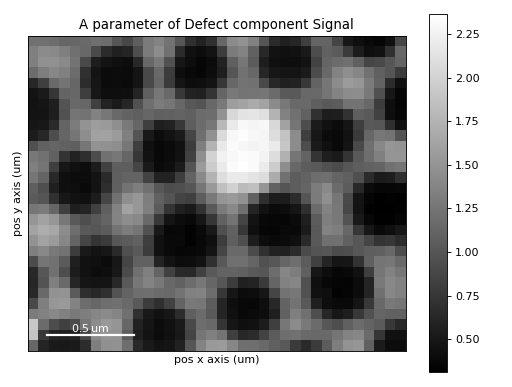

<IPython.core.display.Javascript object>


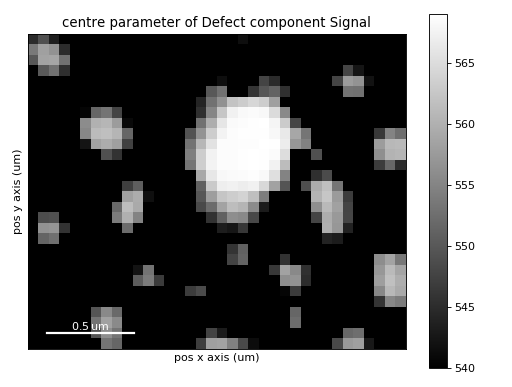

<IPython.core.display.Javascript object>


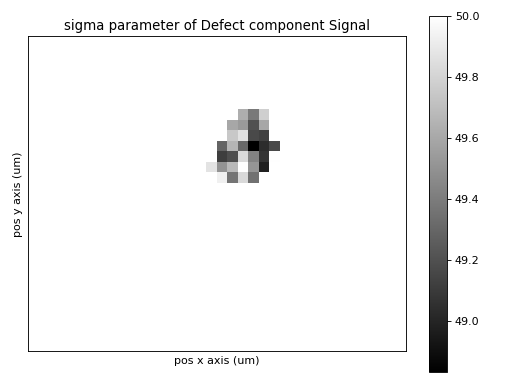

In [53]:
m.plot_results()

In [26]:
help(g1)

Help on Gaussian in module hyperspy._components.gaussian object:

class Gaussian(hyperspy.component.Component)
 |  Normalized gaussian function component
 |  
 |  .. math::
 |  
 |      f(x) = \frac{a}{\sqrt{2\pi c^{2}}}exp\left[-\frac{\left(x-b\right)^{2}}{2c^{2}}\right]
 |  
 |  +------------+-----------+
 |  | Parameter  | Attribute |
 |  +------------+-----------+
 |  +------------+-----------+
 |  |     a      |     A     |
 |  +------------+-----------+
 |  |     b      |  centre   |
 |  +------------+-----------+
 |  |     c      |   sigma   |
 |  +------------+-----------+
 |  
 |  For convenience the `fwhm` attribute can be used to get and set
 |  the full-with-half-maximum.
 |  
 |  See also
 |  --------
 |  hyperspy._components.gaussianhf.GaussianHF
 |  
 |  Method resolution order:
 |      Gaussian
 |      hyperspy.component.Component
 |      traits.has_traits.HasTraits
 |      traits.ctraits.CHasTraits
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init_

  A |    # | Strategy
 -- | ---- | -------------------------
  x |    0 | Reduced chi squared strategy
    |    1 | Histogram global strategy


<IPython.core.display.Javascript object>


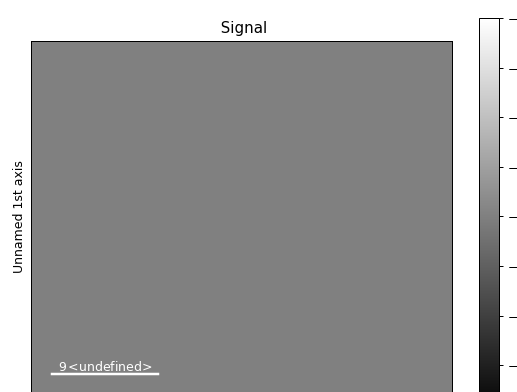

In [6]:
samf = m.create_samfire(workers=4, ipyparallel=False)
print(samf.strategies)
samf.metadata.goodness_test.tolerance = 1.2 # use a sensible value
samf.remove(1) # likely you don't want histogram
samf.refresh_database()

samf.start(fitter='mpfit', bounded=True)
#m.plot_results()



<IPython.core.display.Javascript object>


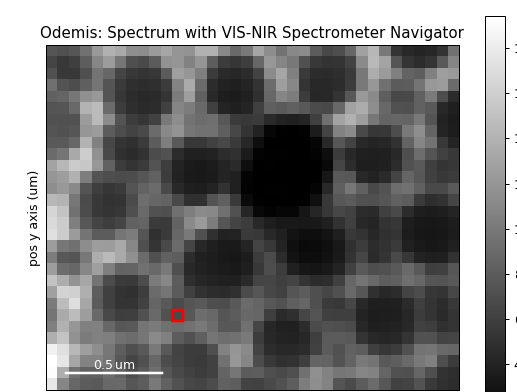

<IPython.core.display.Javascript object>


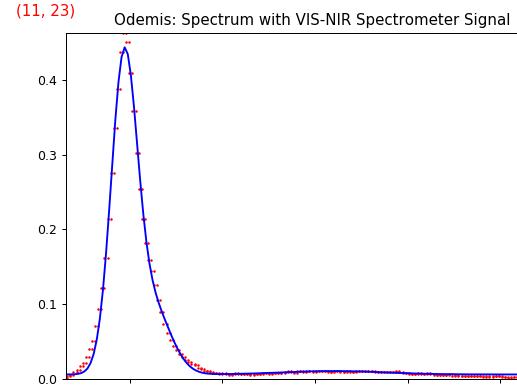

In [7]:
m.plot()